# ACTIVIDAD 6

In [ ]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/7%20Evoluci%C3%B3n%20Diferencial/C%C3%B3digos/Plot_Surf.py'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

In [27]:
# Griewank
#f = lambda x, y: ((x ** 2 / 4000) + (y ** 2 / 4000)) - (np.cos(x) * np.cos(y / np.sqrt(2))) + 1
# Rastrigin
#f = lambda x, y: 10 * 2 + x ** 2 + y ** 2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)
# Sphere
f = lambda x, y: (x - 2) ** 2 + (y - 2) ** 2

## Parámetros

In [28]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

G = 30
N = 50
D = 2

F = 0.6
CR = 0.9

x = np.zeros((D, N))
fitness = np.zeros(N)

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeroslot = np.zeros(G)

## Evolución Diferencial

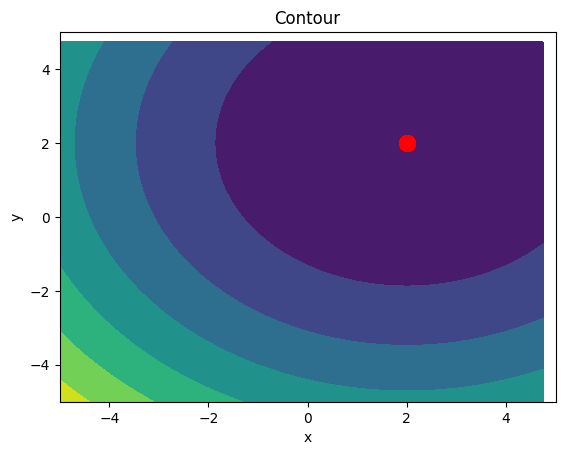

Mínimo global en x= 2.000001121831994  y= 1.9997698460533753  f(x,y)= 5.297209765396349e-08


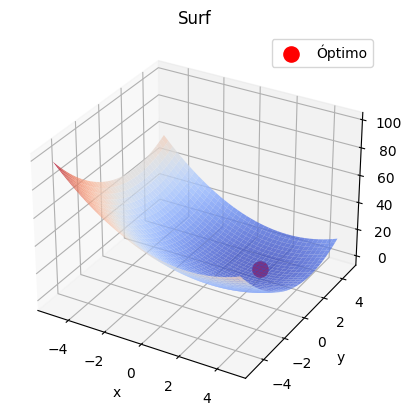

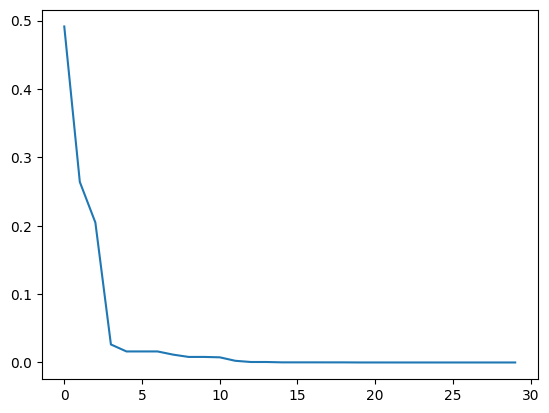

In [29]:
# Algoritmo DE
for n in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        r3 = r2
        while r3 == r2 or r3 == r1 or r3 == i:
            r3 = np.random.randint(N)

        v = x[:, r1] + F * (x[:, r2] - x[:, r3])

        # Recombinación
        u = np.zeros(D)

        for j in range(D):
            r = np.random.rand()

            if r <= CR:
                u[j] = v[j]
            else:
                u[j] = x[j, i]

        # Selección
        fitness_u = f(u[0], u[1])

        if fitness_u < fitness[i]:
            x[:,i] = u
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)
